# pake model 3 dan 4

In [ ]:
!pip install keras==2.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.10.0 which is incompatible.


In [ ]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 896.4 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional, Input, TimeDistributed
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from keras.models import load_model, Model
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Total Data : 4193
netral : 833
porn : 834
hoaks : 833
cb : 854
hs : 839


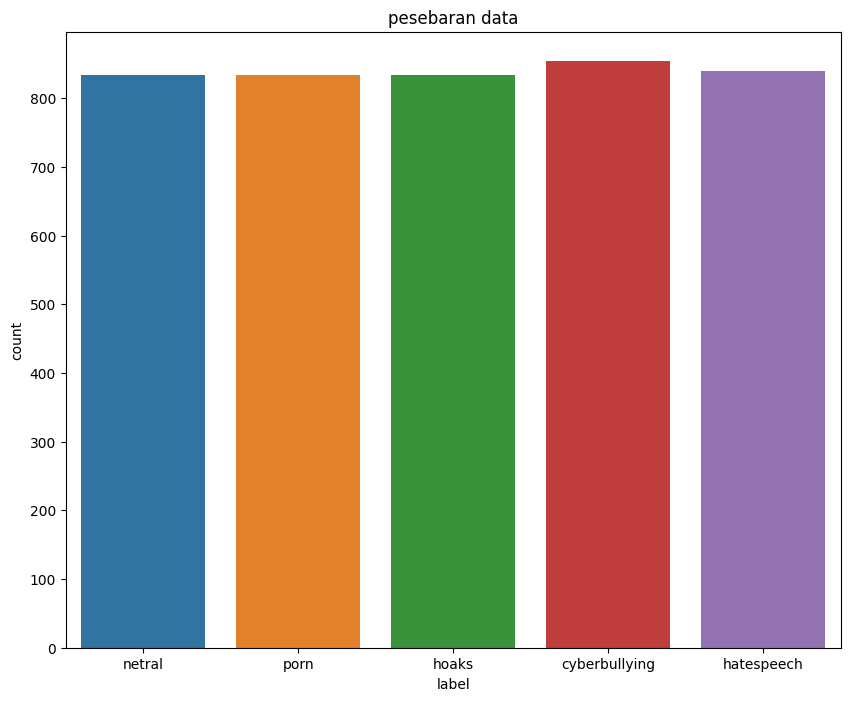

In [ ]:
data = pd.read_excel("/content/gdrive/MyDrive/skripsi fix/tes setelah dibanding.xlsx")
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True) # memastikan tidak ada nilai yang kosong
data['label'] = data['label'].replace({0: 'netral', 1: 'porn', 2: 'hoaks', 3: 'cyberbullying', 4: 'hatespeech'})

netral = data.loc[data['label'] == 'netral', 'tweet'].copy().reset_index(drop=True)
pornografi = data.loc[data['label'] == 'porn', 'tweet'].copy().reset_index(drop=True)
hoaks = data.loc[data['label'] == 'hoaks', 'tweet'].copy().reset_index(drop=True)
cyberbullying = data.loc[data['label'] == 'cyberbullying', 'tweet'].copy().reset_index(drop=True)
hatespeech = data.loc[data['label'] == 'hatespeech', 'tweet'].copy().reset_index(drop=True)

print("Total Data :", len(data))
print("netral :", len(netral))
print("porn :", len(pornografi))
print("hoaks :", len(hoaks))
print("cb :", len(cyberbullying))
print("hs :", len(hatespeech))

plt.figure(figsize=(10,8))
sns.countplot(x='label', data=data)
plt.title("pesebaran data")
plt.show()


Total Data : 4193
netral : 833
porn : 834
hoaks : 833
cb : 854
hs : 839


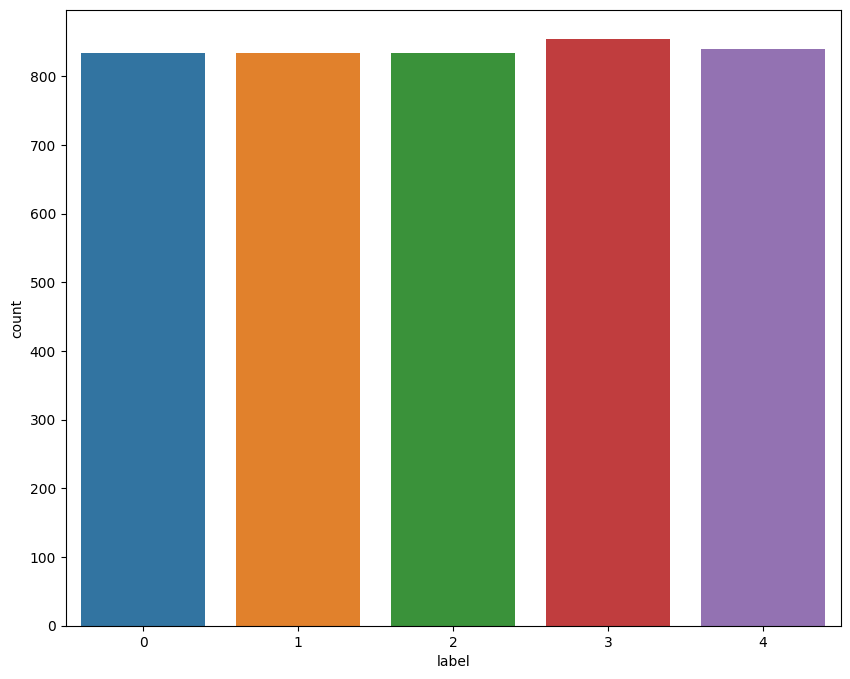

In [ ]:
data = pd.read_excel("/content/gdrive/MyDrive/skripsi fix/tes setelah dibanding.xlsx")
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True) # memastikan tidak ada nilai yang kosong
netral = data.loc[data['label'] == 0, 'tweet'].copy().reset_index(drop=True)
pornografi = data.loc[data['label'] == 1, 'tweet'].copy().reset_index(drop=True)
hoaks = data.loc[data['label'] == 2, 'tweet'].copy().reset_index(drop=True)
cyberbullying = data.loc[data['label'] == 3, 'tweet'].copy().reset_index(drop=True)
hatespeech = data.loc[data['label'] == 4, 'tweet'].copy().reset_index(drop=True)
print("Total Data :", len(data))
print("netral :", len(netral))
print("porn :", len(pornografi))
print("hoaks :", len(hoaks))
print("cb :", len(cyberbullying))
print("hs :", len(hatespeech))

plt.figure(figsize=(10,8))
sns.countplot(x='label', data=data)
plt.show()

In [ ]:
# Splitting Data
text = data['tweet'].values
label = data['label'].values
data_train, data_test, label_train, label_test = train_test_split(text, label, test_size=0.2, random_state=42)
data_test, data_val, label_test, label_val = train_test_split(data_test, label_test, test_size= 0.5, random_state=42)

In [ ]:
# Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

vocab = max([len(tokenizer.word_index)]) + 1 # kamus kata
maxlen = max([len(i.split()) for i in text]) # panjang input sequence
batch_size = 32 # penentuan jumlah sample yang ditraining pada tiap epoch
num_epochs = 5 # banyak iterasi pada saat training model
initializer = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=5)

In [ ]:
#Data Train
X_train = tokenizer.texts_to_sequences(data_train)
X_train = pad_sequences(X_train, maxlen=maxlen)
Y_train = to_categorical(label_train, num_classes = 5)

#Data Test
X_test = tokenizer.texts_to_sequences(data_test)
X_test = pad_sequences(X_test, maxlen=maxlen)
Y_test = to_categorical(label_test, num_classes = 5)

#Data Validation
X_val = tokenizer.texts_to_sequences(data_val)
X_val = pad_sequences(X_val, maxlen=maxlen)
Y_val = to_categorical(label_val, num_classes = 5)

# struktur

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
]

# optimizer = tf.keras.optimizers.Adam()

def get_model1(X, Y):
    model = Sequential()
    model.add(Embedding(input_dim = vocab, output_dim = 128, input_length = maxlen, embeddings_initializer = initializer))
    model.add(LSTM(64, recurrent_initializer = initializer, kernel_initializer = initializer, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dense(5, activation='softmax', kernel_initializer = initializer))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=METRICS)
    print(model.summary())

    return model

def get_model2(X, Y):
    model = Sequential()
    model.add(Embedding(input_dim = vocab, output_dim = 128, input_length = maxlen, embeddings_initializer = initializer))
    model.add(Bidirectional(LSTM(64, recurrent_initializer = initializer, kernel_initializer = initializer, return_sequences=True)))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(5, activation='softmax', kernel_initializer = initializer))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=METRICS)
    print(model.summary())

    return model

def get_model3(X, Y):
    model = Sequential()
    model.add(Embedding(input_dim = vocab, output_dim = 128, input_length = maxlen, embeddings_initializer = initializer))
    model.add(Dropout(0.9))
    model.add(LSTM(64, recurrent_initializer = initializer, kernel_initializer = initializer, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dense(5, activation='softmax', kernel_initializer = initializer))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=METRICS)
    print(model.summary())

    return model

def get_model4(X, Y):
    model = Sequential()
    model.add(Embedding(input_dim = vocab, output_dim = 128, input_length = maxlen, embeddings_initializer = initializer))
    model.add(Dropout(0.9))
    model.add(Bidirectional(LSTM(64, recurrent_initializer = initializer, kernel_initializer = initializer, return_sequences=True)))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(5, activation='softmax', kernel_initializer = initializer))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=METRICS)
    print(model.summary())

    return model

def plot_history(histories, key='loss'):
    plt.figure(figsize=(10,6))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()
        plt.xlim([0,max(history.epoch)])

def plot_history_acc(histories, key='accuracy'):
    plt.figure(figsize=(10,6))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

        plt.xlabel('Epochs')
        plt.ylabel(key.replace('_',' ').title())
        plt.legend()
        plt.xlim([0,max(history.epoch)])

def evaluation(model, X, Y):
    # Predict the values
    Y_pred = model.predict(X)
    Y_pred_class = np.argmax(Y_pred, axis=1)
    Y_act = Y
    # # accuracy
    # accuracy = accuracy_score(Y_act, Y_pred_class)
    # print("Accuracy: %.2f" % (accuracy*100), "%")
    # # precision
    # precision = precision_score(Y_act, Y_pred_class, average='micro')
    # print("Precision: %.2f" % (precision*100), "%")
    # # recall
    # recall = recall_score(Y_act, Y_pred_class, average='micro')
    # print("Recall: %.2f" % (recall*100), "%")

    return Y_act, Y_pred_class

def conf_matrix(Y_act, Y_pred):
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_act, Y_pred)
    plt.figure(figsize=(10,8))
    ticklabels  = ['netral', 'porn', 'hoaks', 'cb', 'hs']
    sns.heatmap(confusion_mtx, annot=True, fmt="d", xticklabels=ticklabels, yticklabels=ticklabels);
    plt.title("Hasil Pengujian")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Model 1

# model 1

In [ ]:
model1 = get_model1(X_train, Y_train)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 200, 128)          1578496   
                                                                 
 lstm_16 (LSTM)              (None, 200, 64)           49408     
                                                                 
 lstm_17 (LSTM)              (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1,661,253
Trainable params: 1,661,253
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# training model
history1 = model1.fit(X_train, Y_train, batch_size=batch_size, epochs=15, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/15
105/105 [==============================] - 21s 166ms/step - loss: 1.4326 - accuracy: 0.8120 - precision: 0.9170 - recall: 0.0659 - val_loss: 1.1701 - val_accuracy: 0.8429 - val_precision: 0.8814 - val_recall: 0.2476
Epoch 2/15
105/105 [==============================] - 10s 94ms/step - loss: 0.8144 - accuracy: 0.8707 - precision: 0.8697 - recall: 0.4159 - val_loss: 0.7620 - val_accuracy: 0.8733 - val_precision: 0.8468 - val_recall: 0.4476
Epoch 3/15
105/105 [==============================] - 9s 90ms/step - loss: 0.4576 - accuracy: 0.9048 - precision: 0.8125 - recall: 0.6810 - val_loss: 0.7116 - val_accuracy: 0.8833 - val_precision: 0.8253 - val_recall: 0.5286
Epoch 4/15
105/105 [==============================] - 5s 46ms/step - loss: 0.3642 - accuracy: 0.9194 - precision: 0.8332 - recall: 0.7463 - val_loss: 0.7183 - val_accuracy: 0.8733 - val_precision: 0.6974 - val_recall: 0.6476
Epoch 5/15
105/105 [==============================] - 7s 63ms/step - loss: 0.3118 - accuracy: 0.9

In [ ]:
model1.evaluate(X_test, np.asarray(Y_test))

21/21 [==============================] - 0s 21ms/step - loss: 0.2018 - accuracy: 0.9288 - precision: 0.8313 - recall: 0.8077


[0.20178914070129395,
 0.9287630319595337,
 0.8312883377075195,
 0.8077496290206909]

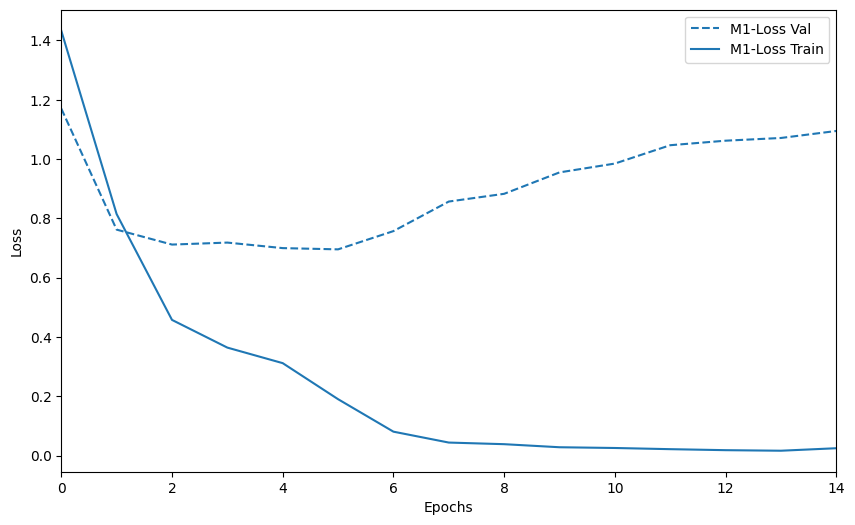

In [ ]:
plot_history([('M1-loss', history1)])

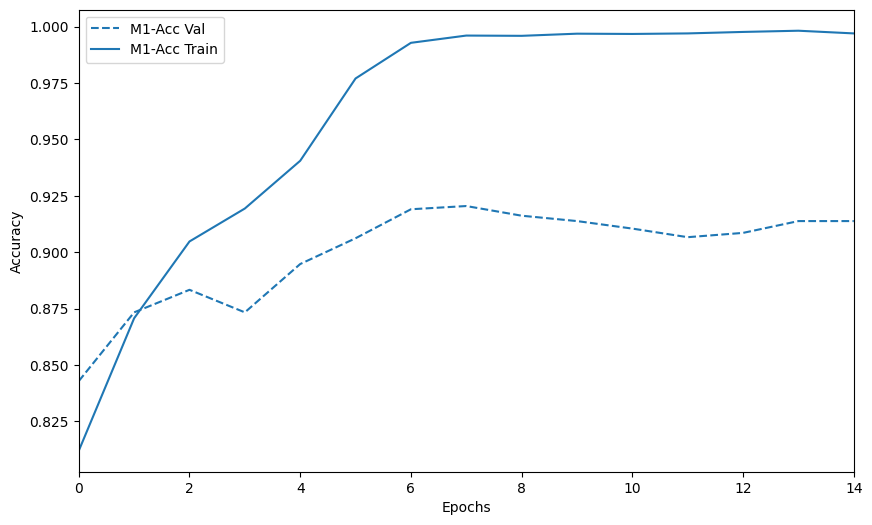

In [ ]:
plot_history_acc([('M1-acc', history1)])

In [ ]:
# Evaluasi 1

Evaluasi Data Test
14/14 [==============================] - 1s 11ms/step


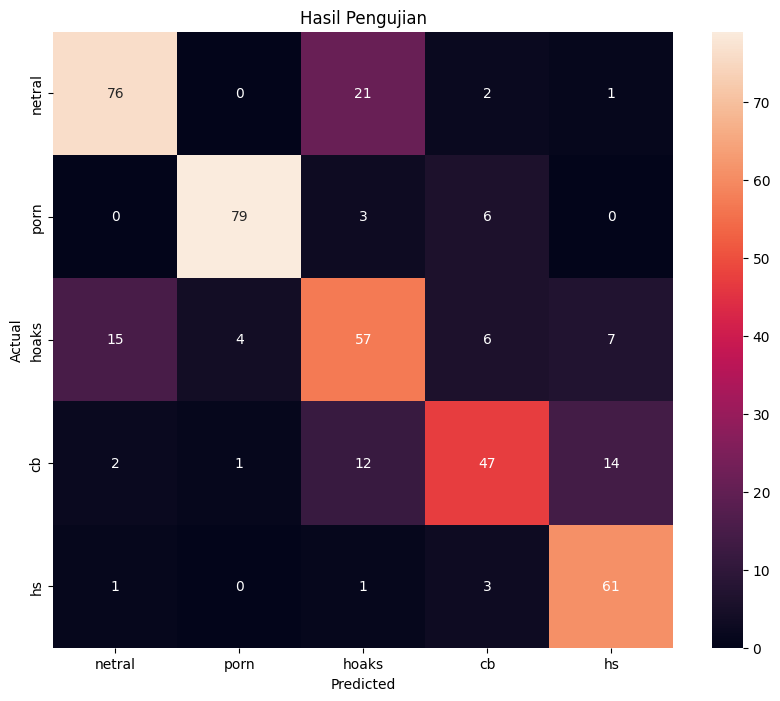

In [ ]:
print("Evaluasi Data Test")
Y_act, Y_pred = evaluation(model1, X_test, label_test)
conf_matrix(Y_act, Y_pred)

Evaluasi Data Train
105/105 [==============================] - 1s 9ms/step


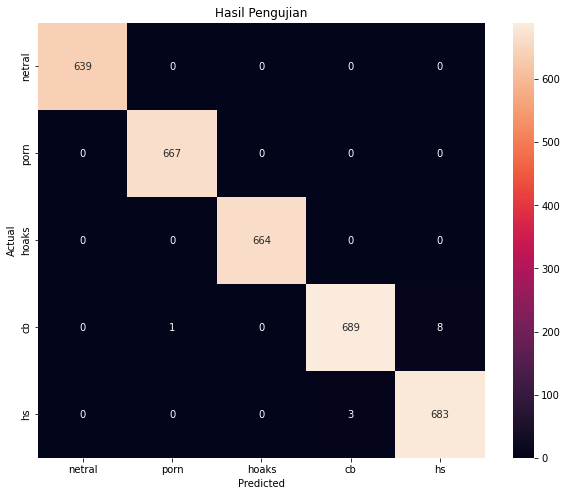

In [ ]:
print("Evaluasi Data Train")
Y_act, Y_pred = evaluation(model1, X_train, label_train)
conf_matrix(Y_act, Y_pred)

# **model2**

In [ ]:
# Model 2

In [ ]:
model2 = get_model2(X_train, Y_train)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 200, 128)          1578496   
                                                                 
 bidirectional_4 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 1,776,773
Trainable params: 1,776,773
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# training model
history2 = model2.fit(X_train, Y_train, batch_size=batch_size, epochs=15, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/15
105/105 [==============================] - 26s 171ms/step - loss: 1.4043 - accuracy: 0.8215 - precision: 0.7485 - recall: 0.1616 - val_loss: 1.1665 - val_accuracy: 0.8252 - val_precision: 0.8630 - val_recall: 0.1500
Epoch 2/15
105/105 [==============================] - 12s 115ms/step - loss: 0.7901 - accuracy: 0.8726 - precision: 0.8168 - recall: 0.4678 - val_loss: 0.7637 - val_accuracy: 0.8662 - val_precision: 0.7026 - val_recall: 0.5738
Epoch 3/15
105/105 [==============================] - 9s 87ms/step - loss: 0.4895 - accuracy: 0.9014 - precision: 0.7979 - recall: 0.6792 - val_loss: 0.6584 - val_accuracy: 0.8771 - val_precision: 0.7143 - val_recall: 0.6429
Epoch 4/15
105/105 [==============================] - 7s 66ms/step - loss: 0.3785 - accuracy: 0.9171 - precision: 0.8209 - recall: 0.7490 - val_loss: 0.7334 - val_accuracy: 0.8843 - val_precision: 0.7479 - val_recall: 0.6357
Epoch 5/15
105/105 [==============================] - 5s 50ms/step - loss: 0.3019 - accuracy: 0.

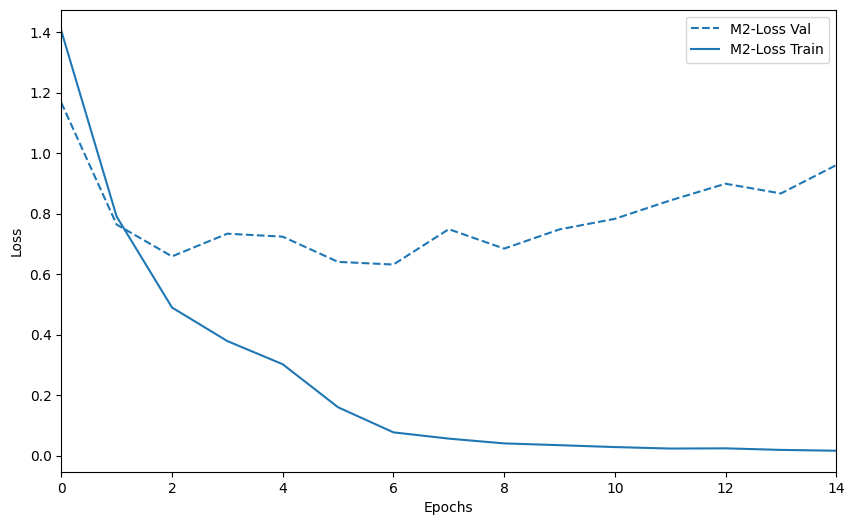

In [ ]:
plot_history([('M2-loss', history2)])

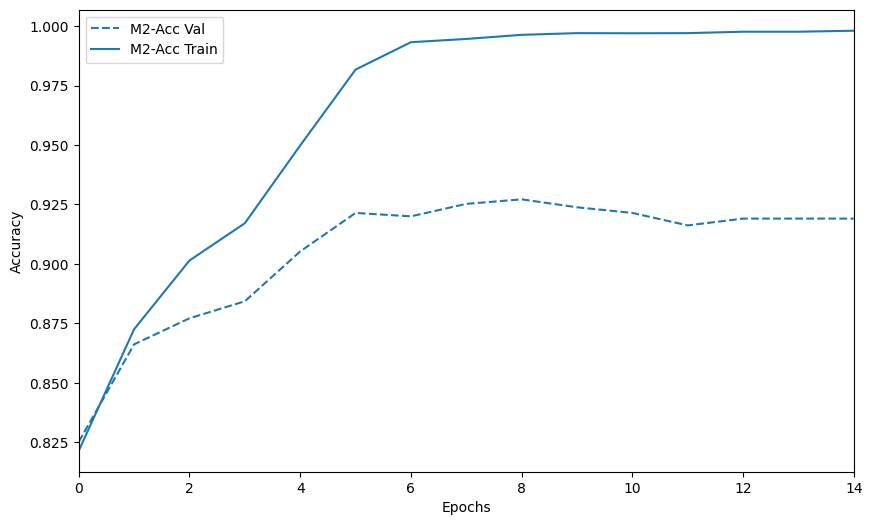

In [ ]:
plot_history_acc([('M2-acc', history2)])

In [ ]:
# Evaluasi 2

Evaluasi Data Test
14/14 [==============================] - 1s 20ms/step


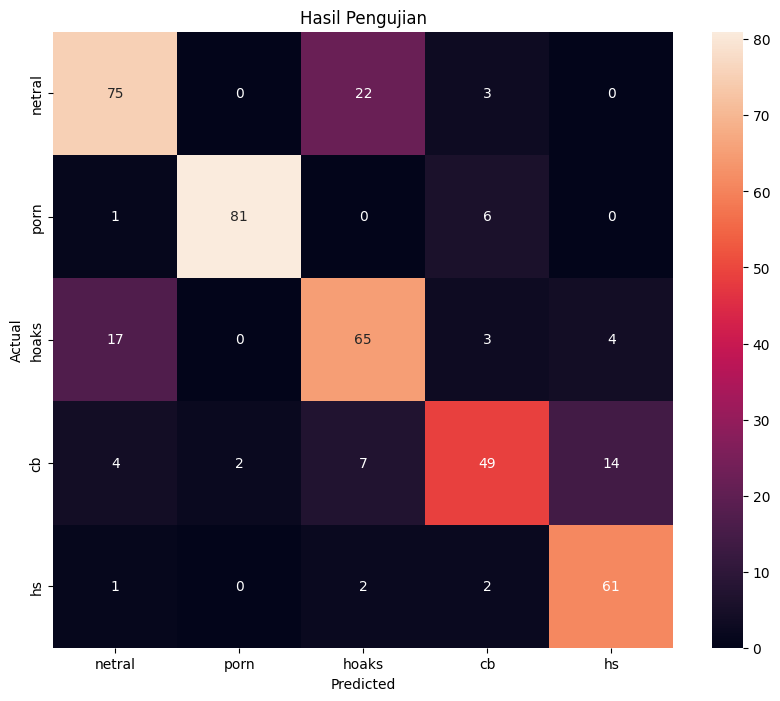

In [ ]:
print("Evaluasi Data Test")
Y_act, Y_pred = evaluation(model2, X_test, label_test)
conf_matrix(Y_act, Y_pred)

Evaluasi Data Train
105/105 [==============================] - 1s 12ms/step


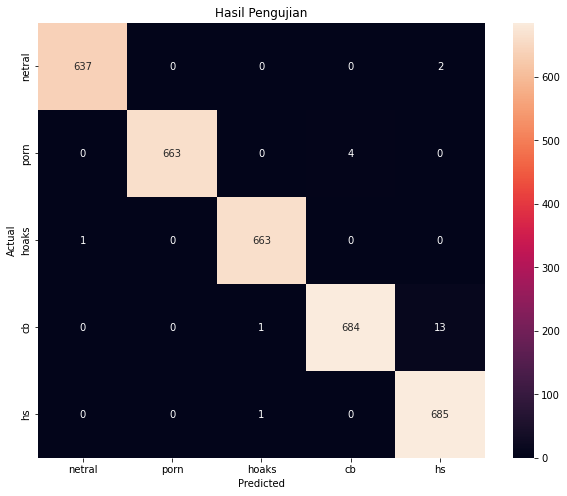

In [ ]:
print("Evaluasi Data Train")
Y_act, Y_pred = evaluation(model2, X_train, label_train)
conf_matrix(Y_act, Y_pred)

In [ ]:
# Model 3

# model 3

In [ ]:
model3 = get_model3(X_train, Y_train)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 200, 128)          1578496   
                                                                 
 dropout_7 (Dropout)         (None, 200, 128)          0         
                                                                 
 lstm_20 (LSTM)              (None, 200, 64)           49408     
                                                                 
 lstm_21 (LSTM)              (None, 64)                33024     
                                                                 
 dense_10 (Dense)            (None, 5)                 325       
                                                                 
Total params: 1,661,253
Trainable params: 1,661,253
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# training model
history3 = model3.fit(X_train, Y_train, batch_size=batch_size, epochs=15, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/15
105/105 [==============================] - 21s 158ms/step - loss: 1.5246 - accuracy: 0.8146 - precision: 0.7936 - recall: 0.0988 - val_loss: 1.3641 - val_accuracy: 0.8081 - val_precision: 0.9474 - val_recall: 0.0429
Epoch 2/15
105/105 [==============================] - 10s 95ms/step - loss: 1.1996 - accuracy: 0.8358 - precision: 0.7618 - recall: 0.2603 - val_loss: 1.1124 - val_accuracy: 0.8410 - val_precision: 0.7500 - val_recall: 0.3071
Epoch 3/15
105/105 [==============================] - 8s 76ms/step - loss: 0.9303 - accuracy: 0.8626 - precision: 0.8228 - recall: 0.3986 - val_loss: 0.9189 - val_accuracy: 0.8562 - val_precision: 0.7341 - val_recall: 0.4405
Epoch 4/15
105/105 [==============================] - 6s 61ms/step - loss: 0.7432 - accuracy: 0.8855 - precision: 0.8002 - recall: 0.5695 - val_loss: 0.7681 - val_accuracy: 0.8890 - val_precision: 0.8066 - val_recall: 0.5857
Epoch 5/15
105/105 [==============================] - 4s 42ms/step - loss: 0.6339 - accuracy: 0.9

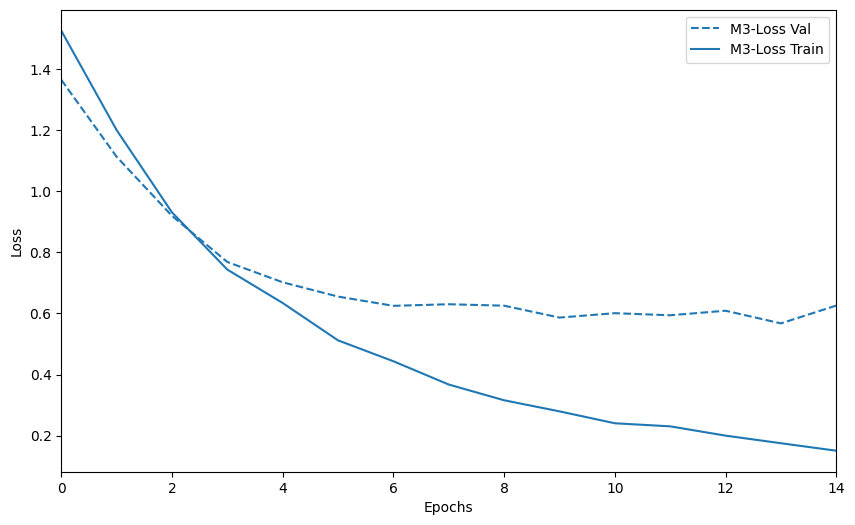

In [ ]:
plot_history([('M3-loss', history3)])

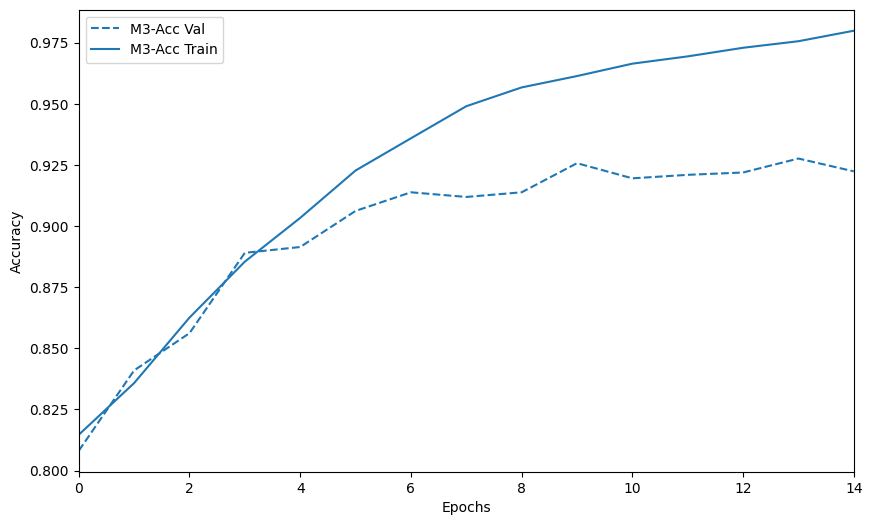

In [ ]:
plot_history_acc([('M3-acc', history3)])

In [ ]:
# Evaluasi 3

Evaluasi Data Test
14/14 [==============================] - 1s 11ms/step


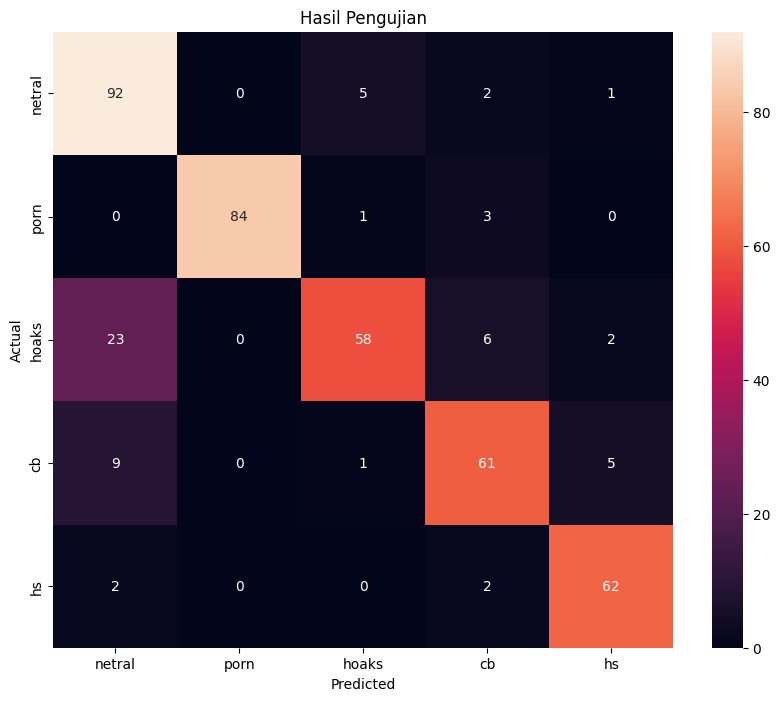

In [ ]:
print("Evaluasi Data Test")
Y_act, Y_pred = evaluation(model3, X_test, label_test)
conf_matrix(Y_act, Y_pred)

Evaluasi Data Train
105/105 [==============================] - 1s 8ms/step


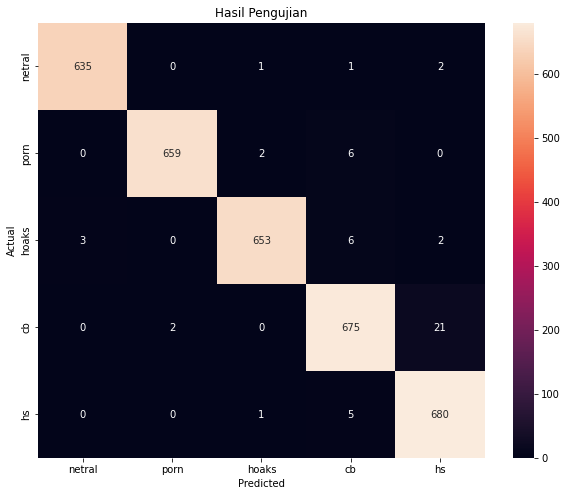

In [ ]:
print("Evaluasi Data Train")
Y_act, Y_pred = evaluation(model3, X_train, label_train)
conf_matrix(Y_act, Y_pred)

# model 4

In [ ]:
# Model 4

In [ ]:
model4 = get_model4(X_train, Y_train)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 200, 128)          1578496   
                                                                 
 dropout_8 (Dropout)         (None, 200, 128)          0         
                                                                 
 bidirectional_6 (Bidirectio  (None, 200, 128)         98816     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_11 (Dense)            (None, 5)                 645       
                                                                 
Total params: 1,776,773
Trainable params: 1,776,773
N

In [ ]:
# training model
history4 = model4.fit(X_train, Y_train, batch_size=batch_size, epochs=15, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/15
105/105 [==============================] - 27s 197ms/step - loss: 1.5203 - accuracy: 0.8152 - precision: 0.8099 - recall: 0.0994 - val_loss: 1.3208 - val_accuracy: 0.8186 - val_precision: 0.9535 - val_recall: 0.0976
Epoch 2/15
105/105 [==============================] - 12s 116ms/step - loss: 1.1405 - accuracy: 0.8340 - precision: 0.7887 - recall: 0.2326 - val_loss: 0.9393 - val_accuracy: 0.8448 - val_precision: 0.7156 - val_recall: 0.3714
Epoch 3/15
105/105 [==============================] - 8s 74ms/step - loss: 0.8316 - accuracy: 0.8710 - precision: 0.7631 - recall: 0.5149 - val_loss: 0.7629 - val_accuracy: 0.8786 - val_precision: 0.7797 - val_recall: 0.5476
Epoch 4/15
105/105 [==============================] - 8s 75ms/step - loss: 0.6731 - accuracy: 0.8964 - precision: 0.7932 - recall: 0.6518 - val_loss: 0.7142 - val_accuracy: 0.8843 - val_precision: 0.7580 - val_recall: 0.6190
Epoch 5/15
105/105 [==============================] - 5s 49ms/step - loss: 0.5733 - accuracy: 0.

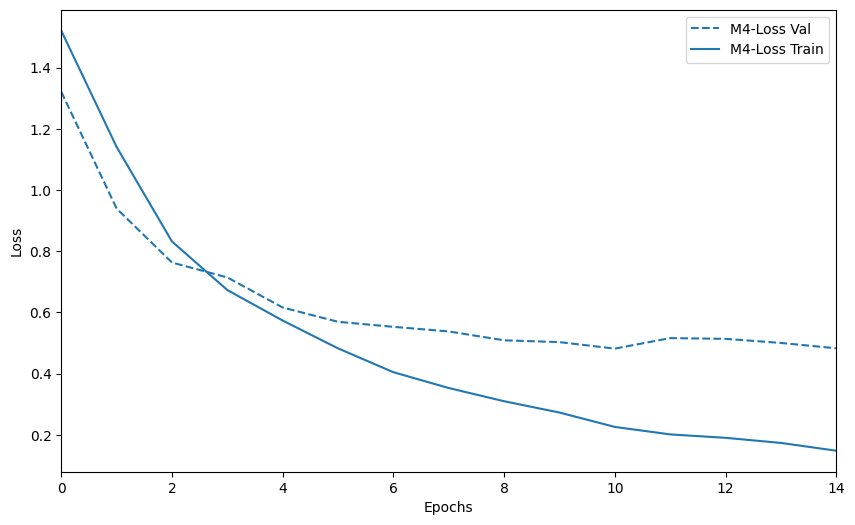

In [ ]:
plot_history([('M4-loss', history4)])

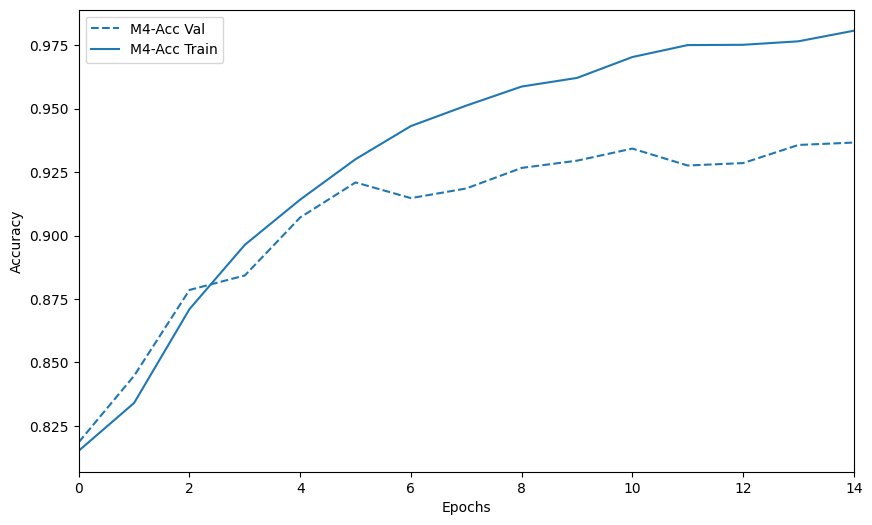

In [ ]:
plot_history_acc([('M4-acc', history4)])

In [ ]:
# Evaluasi 4

Evaluasi Data Test
14/14 [==============================] - 1s 18ms/step


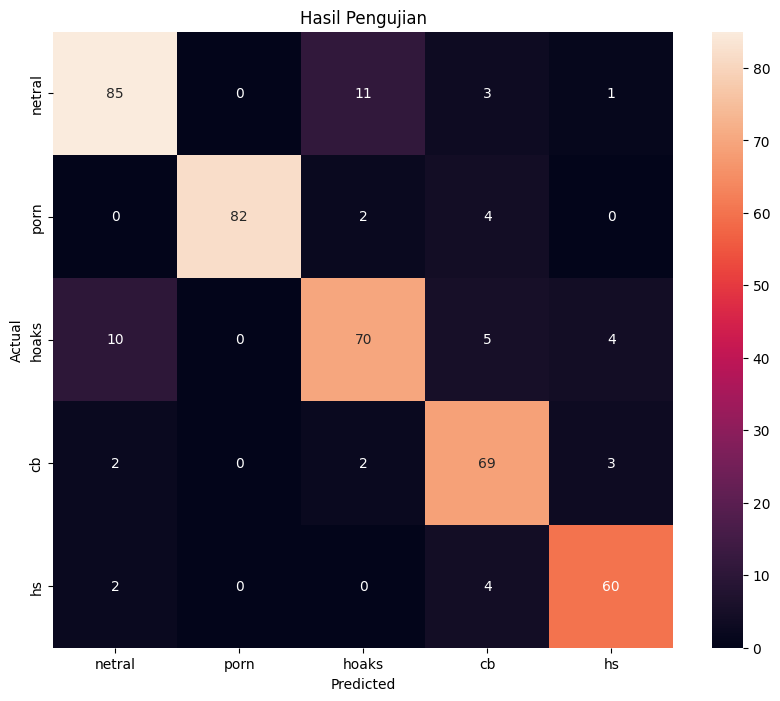

In [ ]:
print("Evaluasi Data Test")
Y_act, Y_pred = evaluation(model4, X_test, label_test)
conf_matrix(Y_act, Y_pred)

Evaluasi Data Train
105/105 [==============================] - 1s 14ms/step


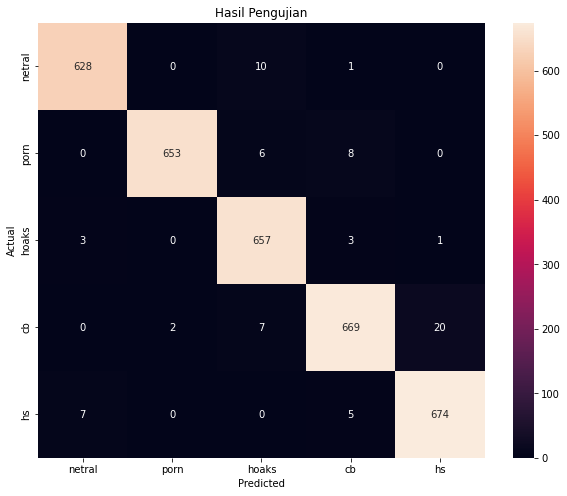

In [ ]:
print("Evaluasi Data Train")
Y_act, Y_pred = evaluation(model4, X_train, label_train)
conf_matrix(Y_act, Y_pred)

In [ ]:
# Grafik Keseluruhan

# grafik compare

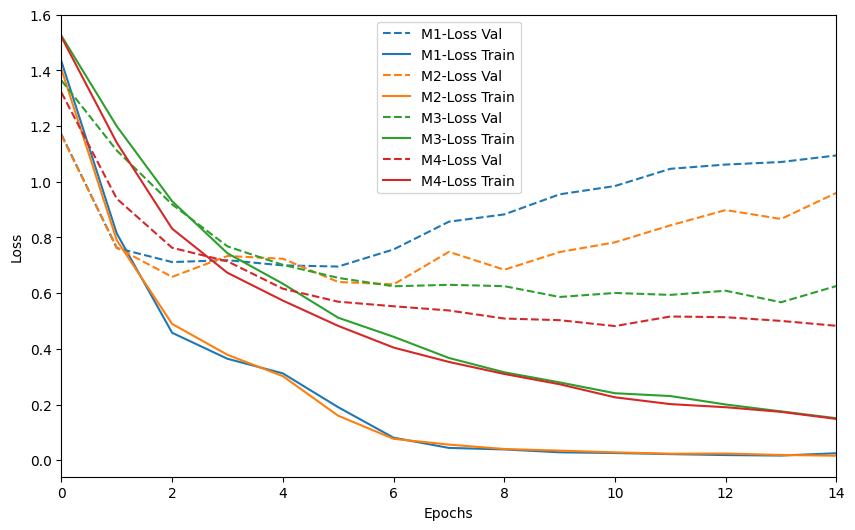

In [ ]:
plot_history([
              ('M1-loss', history1),
              ('M2-loss', history2),
              ('M3-loss', history3),
              ('M4-loss', history4)
              ])

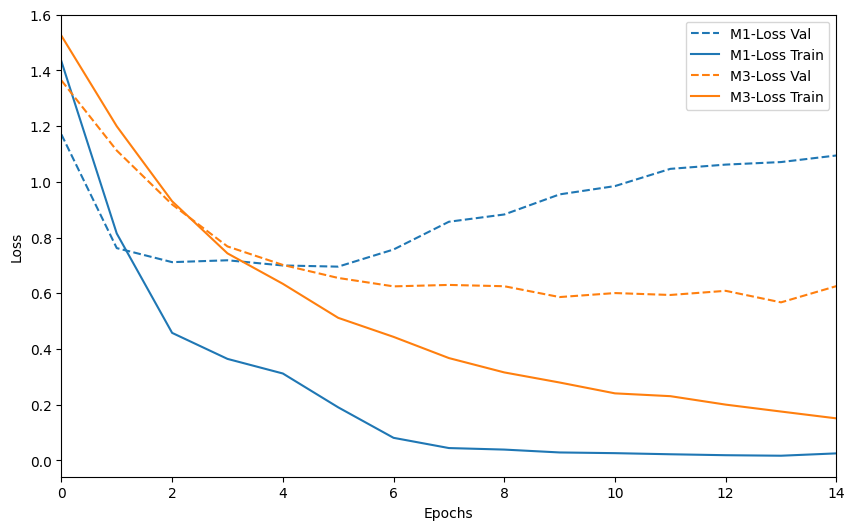

In [ ]:
plot_history([
              ('M1-loss', history1),
              # ('M2-loss', history2),
              ('M3-loss', history3),
              # ('M4-loss', history4)
              ])

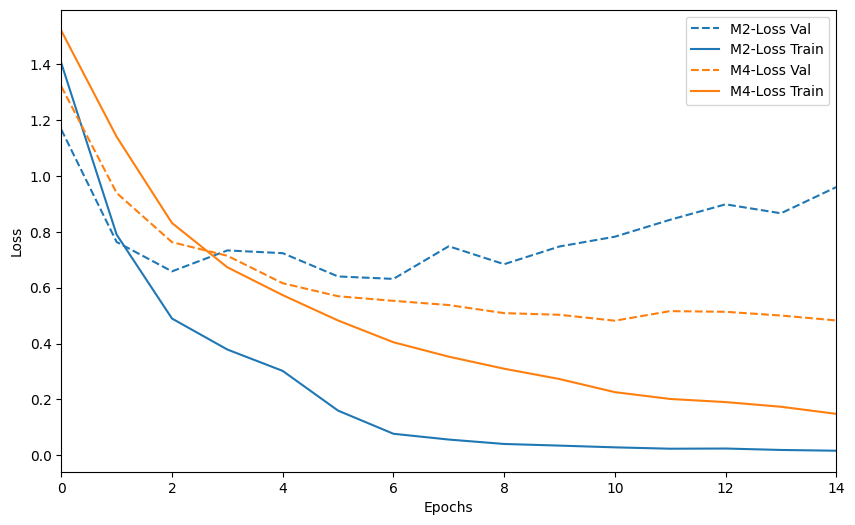

In [ ]:
plot_history([
              # ('M1-loss', history1),
              ('M2-loss', history2),
              # ('M3-loss', history3),
              ('M4-loss', history4)
              ])

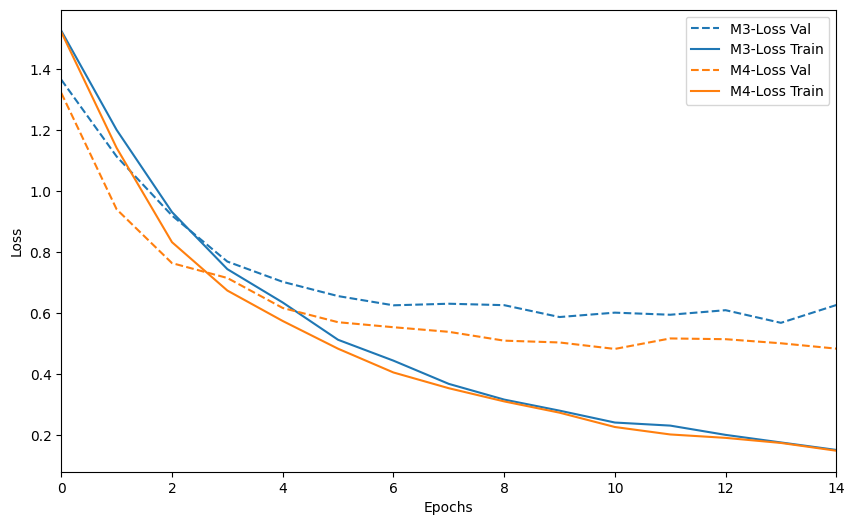

In [ ]:
plot_history([
              # ('M1-loss', history1),
              # ('M2-loss', history2),
              ('M3-loss', history3),
              ('M4-loss', history4)
              ])

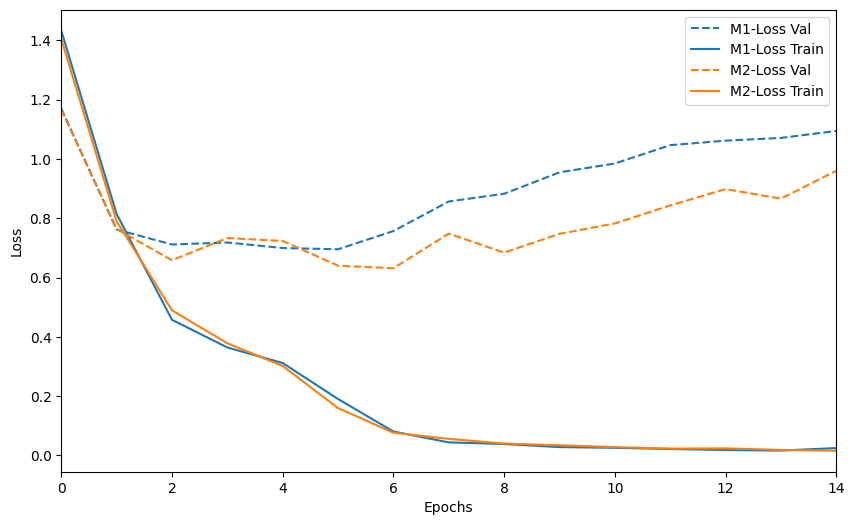

In [ ]:
plot_history([
              ('M1-loss', history1),
              ('M2-loss', history2)
              # ('M3-loss', history3),
              # ('M4-loss', history4)
              ])

In [ ]:
# Save Model

In [ ]:
# model1.save('/content/gdrive/MyDrive/skripsi fix/BiLSTM1.h5')
# model2.save('/content/gdrive/MyDrive/skripsi fix/BiLSTM2.h5')
model3.save('/content/gdrive/MyDrive/skripsi fix/model LSTM fix31.h5')
# model4.save('/content/gdrive/MyDrive/skripsi fix/model BiLSTM fix.h5')

# Testing data

In [ ]:
from ipywidgets import widgets, Layout, Label
from IPython.display import display, clear_output
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re
import string
import unicodedata
import nltk

from termcolor import colored

In [ ]:
print("Deteksi Konten")
button = widgets.ToggleButton(description="Check")
text = widgets.Text(layout=Layout(width='60%'))
output = widgets.Output()

def on_button_clicked(b):
    output.clear_output()
    with output:
        kalimat = text.value
        kalimat = tokenizer.texts_to_sequences([kalimat])
        kalimat = pad_sequences(kalimat, maxlen=maxlen)
        pred = model4.predict(kalimat)
        print("Status Konten: ")
        for i in range(len(pred)):
            if(np.argmax(pred[i]) == 0):
                netral = colored('netral')
                print(netral)
            elif (np.argmax(pred[i]) == 1):
                pornografi = colored('pornografi')
                print(pornografi)
            elif (np.argmax(pred[i]) == 2):
                hoaks = colored('hoaks', color='grey')
                print(hoaks)
            elif (np.argmax(pred[i]) == 3):
                cyberbullying = colored('cyberbullying')
                print(cyberbullying)
            elif (np.argmax(pred[i]) == 4):
                hate_speech = colored('hate speech')
                print(hate_speech)

display(text)
display(button, output)
button.observe(on_button_clicked)


In [ ]:
unlabeled = pd.read_excel("/content/gdrive/MyDrive/skripsi fix/tes setelah dibanding_unlabeled.xlsx")
unlabeled.replace('', np.nan, inplace=True)
unlabeled.dropna(inplace=True)

In [ ]:
unlabeled = pd.read_excel("/content/gdrive/MyDrive/skripsi fix/tes setelah dibanding.xlsx")
unlabeled.replace('', np.nan, inplace=True)
unlabeled.dropna(inplace=True)

In [ ]:
un_text = unlabeled['tweet'].values

In [ ]:
text1 = tokenizer.texts_to_sequences(un_text)
text1 = pad_sequences(text1, maxlen=maxlen)

In [ ]:
pred_label = model3.predict(text1)
label1 = np.argmax(pred_label, axis = 1)

132/132 [==============================] - 1s 7ms/step


In [ ]:
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 4.6 MB/s eta 0:00:00


In [ ]:
import xlsxwriter

In [ ]:
workbook = xlsxwriter.Workbook('/content/gdrive/MyDrive/skripsi fix/model/hasil_tes.xlsx')
worksheet = workbook.add_worksheet()

row = 0
col = 0

rowHeaders = ['tweet', 'label']
worksheet.write_row(row, col,  tuple(rowHeaders))


for i in un_text:
    tweet = i
    rowValues = [tweet]
    row += 1
    worksheet.write_row(row, col, tuple(rowValues))

row = 0
for l in label1:
    label = l
    rowValues = [label]
    row += 1
    worksheet.write_row(row, col + 1, tuple(rowValues))

workbook.close()